In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification


In [3]:
X,y=make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [4]:
df=pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])

In [5]:
df['target']=y

In [6]:
df.shape

(100, 6)

In [7]:
df.head()

,col1,col2,col3,col4,col5,target
0,-0.705643,1.084264,-1.912466,-1.956739,-0.793526,0
1,-3.809481,-0.671456,-2.428884,0.417322,0.992561,1
2,-1.313484,1.073012,0.675827,1.992793,2.049473,0
3,-0.564136,1.264594,-0.410986,-1.452308,1.763211,0
4,0.586428,-1.416983,-0.678372,-2.571482,1.801190,1


In [8]:

# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [32]:
# function for feature sample
import random

def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [10]:

# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [11]:
df1=sample_rows(df,0.2)

In [12]:
df2=sample_rows(df,0.2)

In [13]:
df3=sample_rows(df,0.2)

In [56]:
df1.shape

(20, 6)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [16]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])

DecisionTreeClassifier()

In [17]:
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])


DecisionTreeClassifier()

In [18]:
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [19]:
from sklearn.tree import plot_tree

[Text(0.5909090909090909, 0.875, 'x[1] <= -0.064\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.36363636363636365, 0.625, 'x[2] <= -0.612\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.18181818181818182, 0.375, 'x[3] <= -2.684\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.5454545454545454, 0.375, 'x[0] <= -1.496\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8181818181818182, 0.625, 'x[0] <= 0.105\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.7272727272727273, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.9090909090909091, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

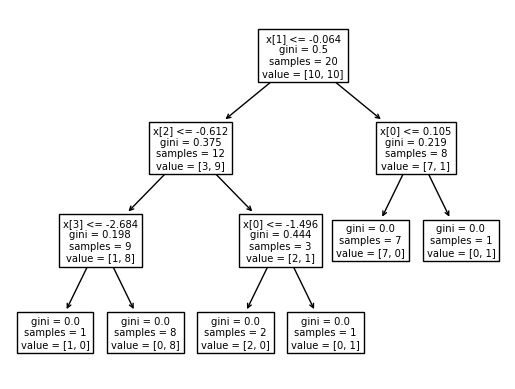

In [20]:
plot_tree(clf1)

[Text(0.5555555555555556, 0.875, 'x[1] <= 0.571\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.3333333333333333, 0.625, 'x[3] <= -1.132\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.2222222222222222, 0.375, 'x[0] <= -1.977\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.7777777777777778, 0.625, 'x[0] <= -2.053\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]')]

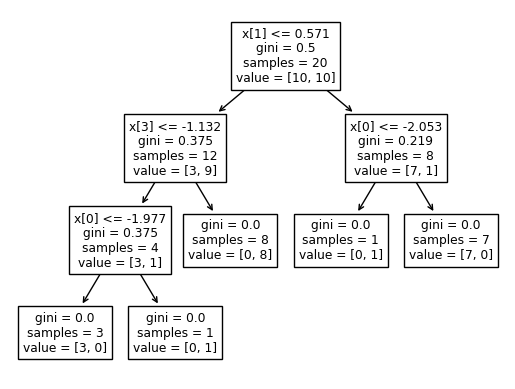

In [21]:
plot_tree(clf2)

[Text(0.5, 0.9, 'x[1] <= 1.063\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.3333333333333333, 0.7, 'x[3] <= -3.798\ngini = 0.391\nsamples = 15\nvalue = [4, 11]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5, 0.5, 'x[1] <= -0.613\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.6666666666666666, 0.3, 'x[4] <= -0.565\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

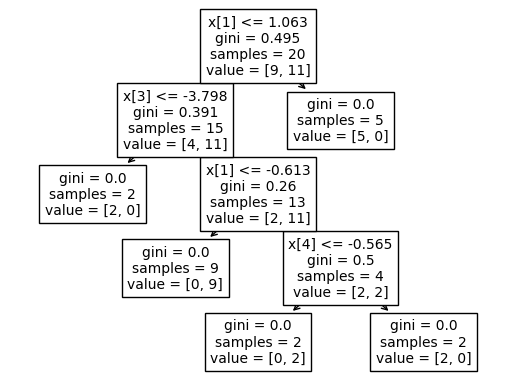

In [22]:
plot_tree(clf3)

In [23]:
clf1.predict(np.array([0.551380,-1.876815,-1.807618,-1.557932,-0.039809]).reshape(1,5))

c:\Users\Ashish Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [24]:
clf2.predict(np.array([0.551380,-1.876815,-1.807618,-1.557932,-0.039809]).reshape(1,5))

c:\Users\Ashish Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [25]:
clf3.predict(np.array([0.551380,-1.876815,-1.807618,-1.557932,-0.039809]).reshape(1,5))

c:\Users\Ashish Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [34]:
df4=sample_features(df,0.5)

C:\Users\Ashish Gupta\AppData\Local\Temp\ipykernel_16736\2591115063.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [36]:
df5=sample_features(df,0.5)


C:\Users\Ashish Gupta\AppData\Local\Temp\ipykernel_16736\2591115063.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [37]:
df6=sample_features(df,0.5)

C:\Users\Ashish Gupta\AppData\Local\Temp\ipykernel_16736\2591115063.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [38]:
clf4=DecisionTreeClassifier()
clf5=DecisionTreeClassifier()
clf6=DecisionTreeClassifier()

In [63]:
clf4.fit(df4.iloc[:,0:2],df4.iloc[:,-1])

DecisionTreeClassifier()

In [61]:
clf5.fit(df5.iloc[:,0:2],df5.iloc[:,-1])

DecisionTreeClassifier()

In [64]:
clf6.fit(df6.iloc[:,0:2],df6.iloc[:,-1])

DecisionTreeClassifier()

In [43]:
print(df4.columns)

Index(['col5', 'col1', 'target'], dtype='object')


In [65]:
clf4.predict(np.array([-1.557932,-0.039809]).reshape(1,2))

c:\Users\Ashish Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [66]:
clf5.predict(np.array([-1.557932,-0.039809]).reshape(1,2))

c:\Users\Ashish Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [67]:
clf6.predict(np.array([-1.557932,-0.039809]).reshape(1,2))

c:\Users\Ashish Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])